<a href="https://colab.research.google.com/github/Elwing-Chou/ximen1129/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千元

In [92]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"],
          columns=boston["feature_names"])
df.to_csv("boston.csv", encoding="utf-8", index=False)
df["ans"] = boston["target"]
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [93]:
# 養成好習慣: 丟到sklearn前, 先從dataframe -> numpy array
import numpy as np
y = np.array(df["ans"])
x = np.array(df.drop(["ans"], axis=1))

In [94]:
from sklearn.model_selection import train_test_split
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [95]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

[Text(390.6, 665.91, 'RM <= 6.971\nsquared_error = 86.856\nsamples = 455\nvalue = 22.672'),
 Text(195.3, 475.65, 'LSTAT <= 14.4\nsquared_error = 42.696\nsamples = 389\nvalue = 20.068'),
 Text(97.65, 285.39, 'DIS <= 1.434\nsquared_error = 28.45\nsamples = 231\nvalue = 23.57'),
 Text(48.825, 95.13, '\n  (...)  \n'),
 Text(146.47500000000002, 95.13, '\n  (...)  \n'),
 Text(292.95000000000005, 285.39, 'CRIM <= 6.992\nsquared_error = 19.392\nsamples = 158\nvalue = 14.949'),
 Text(244.125, 95.13, '\n  (...)  \n'),
 Text(341.77500000000003, 95.13, '\n  (...)  \n'),
 Text(585.9000000000001, 475.65, 'RM <= 7.437\nsquared_error = 71.709\nsamples = 66\nvalue = 38.017'),
 Text(488.25, 285.39, 'NOX <= 0.659\nsquared_error = 32.113\nsamples = 37\nvalue = 32.6'),
 Text(439.425, 95.13, '\n  (...)  \n'),
 Text(537.075, 95.13, '\n  (...)  \n'),
 Text(683.5500000000001, 285.39, 'RM <= 8.753\nsquared_error = 37.034\nsamples = 29\nvalue = 44.928'),
 Text(634.725, 95.13, '\n  (...)  \n'),
 Text(732.375, 95.

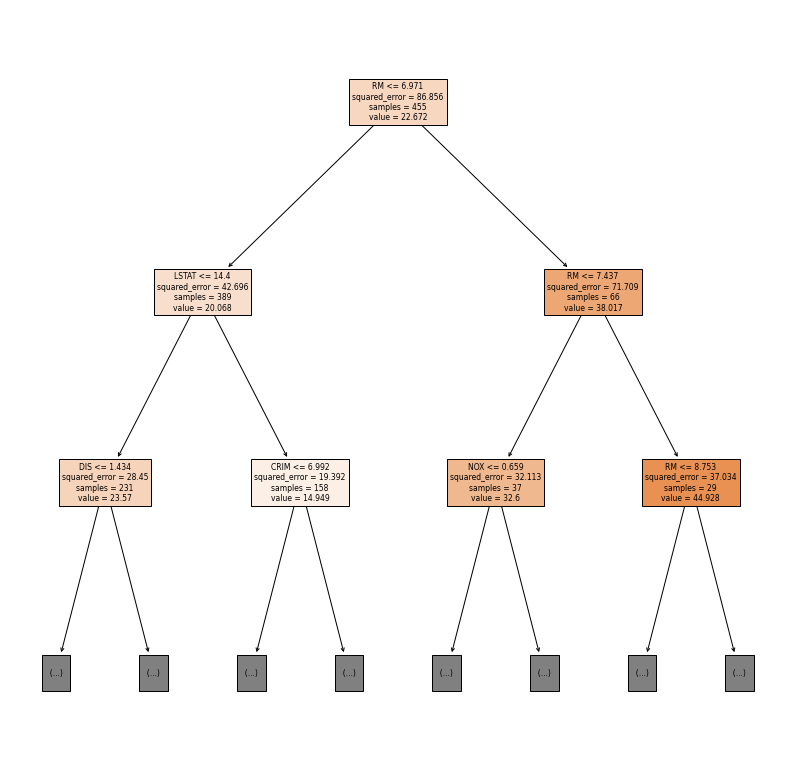

In [96]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(reg, 
     feature_names=boston["feature_names"],
     filled=True,
     max_depth=2)

In [97]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.6691632128007021